In [470]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from tqdm import tqdm
from matplotlib_venn import venn2
%matplotlib inline

In [294]:
mouse_38 = pd.read_csv('../ref_genome/mm38/Mus_musculus.GRCm38.81.gtf', skiprows= 5, sep = '\t', header = None)

/home/daria/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [295]:
mouse_38[8][1]

'gene_id "ENSMUSG00000102693"; gene_version "1"; transcript_id "ENSMUST00000193812"; transcript_version "1"; gene_name "4933401J01Rik"; gene_source "havana"; gene_biotype "TEC"; havana_gene "OTTMUSG00000049935"; havana_gene_version "1"; transcript_name "4933401J01Rik-001"; transcript_source "havana"; transcript_biotype "TEC"; havana_transcript "OTTMUST00000127109"; havana_transcript_version "1"; tag "basic"; transcript_support_level "NA";'

In [296]:
mouse_38['gene_id'] = mouse_38[8].map(lambda x: re.findall(r'gene_id "(\w+)"', x)[0])
mouse_38['gene_biotype'] = mouse_38[8].map(lambda x: re.findall(r'gene_biotype "(\w+)"', x)[0])

In [297]:
mouse_38.head()

,0,1,2,3,4,5,6,7,8,gene_id,gene_biotype
0,1,havana,gene,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""1""...",ENSMUSG00000102693,TEC
1,1,havana,transcript,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""1""...",ENSMUSG00000102693,TEC
2,1,havana,exon,3073253,3074322,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""1""...",ENSMUSG00000102693,TEC
3,1,ensembl,gene,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842""; gene_version ""1""...",ENSMUSG00000064842,snRNA
4,1,ensembl,transcript,3102016,3102125,.,+,.,"gene_id ""ENSMUSG00000064842""; gene_version ""1""...",ENSMUSG00000064842,snRNA


In [298]:
def f_name(x):
    try:
        return re.findall(r'gene_name "(\S+)"', x)[0]
    except IndexError:
        return np.nan
mouse_38['gene_name'] = mouse_38[8].map(f_name)

In [299]:
mouse_38.gene_biotype.unique()

array(['TEC', 'snRNA', 'protein_coding', 'processed_pseudogene',
       'antisense', 'sense_intronic', 'lincRNA', 'processed_transcript',
       'miRNA', 'snoRNA', 'misc_RNA', 'unprocessed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'sense_overlapping', 'rRNA',
       'transcribed_processed_pseudogene', 'pseudogene', 'ribozyme',
       'unitary_pseudogene', 'scaRNA', 'polymorphic_pseudogene',
       'macro_lncRNA', '3prime_overlapping_ncrna', 'TR_V_gene',
       'TR_V_pseudogene', 'TR_D_gene', 'TR_J_gene', 'TR_C_gene',
       'TR_J_pseudogene', 'IG_LV_gene', 'IG_V_gene', 'IG_V_pseudogene',
       'IG_J_gene', 'IG_C_gene', 'sRNA',
       'translated_unprocessed_pseudogene', 'IG_C_pseudogene',
       'IG_D_gene', 'IG_D_pseudogene', 'Mt_tRNA', 'Mt_rRNA'], dtype=object)

In [300]:
mouse_38 = mouse_38[mouse_38.gene_biotype == 'protein_coding'].copy()

In [301]:
def f_tr(x):
    try:
        return re.findall(r'transcript_id "(\S+)"', x)[0]
    except IndexError:
        return np.nan
mouse_38['transcript_id'] = mouse_38[8].map(f_tr)

In [302]:
mouse_38.head()

,0,1,2,3,4,5,6,7,8,gene_id,gene_biotype,gene_name,transcript_id
6,1,ensembl_havana,gene,3205901,3671498,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,NaN
7,1,havana,transcript,3205901,3216344,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,ENSMUST00000162897
8,1,havana,exon,3213609,3216344,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,ENSMUST00000162897
9,1,havana,exon,3205901,3207317,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,ENSMUST00000162897
10,1,havana,transcript,3206523,3215632,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,ENSMUST00000159265


In [303]:
mouse_38_genes = mouse_38[mouse_38[2] == 'gene']

In [304]:
mouse_38_genes.shape

(22159, 13)

In [305]:
mouse_38_tr = mouse_38[mouse_38[2] == 'transcript']

In [306]:
mouse_38_tr.shape

(82460, 13)

In [308]:
#for i in tqdm(mouse_38['gene_id'].unique()):
#    mouse_38.loc[mouse_38['gene_id'] == i, 'gene_start'] = mouse_38.loc[(mouse_38['gene_id'] == i) & (mouse_38[2] == 'gene'), 3]
#    mouse_38.loc[mouse_38['gene_id'] == i, 'gene_end'] = mouse_38.loc[(mouse_38['gene_id'] == i) & (mouse_38[2] == 'gene'), 4]

In [317]:
for i in tqdm(mouse_38_tr['gene_id'].unique()):
    mouse_38_genes.loc[mouse_38_genes['gene_id'] == i, 'length_of_the_longest_tr_coord'] = (abs(mouse_38_tr.loc[mouse_38_tr['gene_id'] == i, 4] - mouse_38_tr.loc[mouse_38_tr['gene_id'] == i, 3]) + 1).max()
    tr_df = mouse_38_tr[mouse_38_tr['gene_id'] == i].copy()
    med_start = tr_df[3].median()
    med_end = tr_df[4].median()
    mouse_38_genes.loc[mouse_38_genes['gene_id'] == i, 'median_start'] = med_start
    mouse_38_genes.loc[mouse_38_genes['gene_id'] == i, 'median_end'] = med_end
    

  0%|          | 0/22159 [00:00<?, ?it/s]/home/daria/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
100%|██████████| 22159/22159 [15:11<00:00, 24.31it/s]


In [328]:
mouse_38_genes.head()

,0,1,2,3,4,5,6,7,8,gene_id,gene_biotype,gene_name,transcript_id,length_of_the_longest_tr_coord,median_start,median_end,gene_length,adj_length
6,1,ensembl_havana,gene,3205901,3671498,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,NaN,457017.0,3206523.0,3216344.0,465598,9822.0
74,1,ensembl_havana,gene,4290846,4409241,.,-,.,"gene_id ""ENSMUSG00000025900""; gene_version ""8""...",ENSMUSG00000025900,protein_coding,Rp1,NaN,118396.0,4317496.0,4384777.5,118396,67282.5
104,1,ensembl_havana,gene,4490931,4497354,.,-,.,"gene_id ""ENSMUSG00000025902""; gene_version ""11...",ENSMUSG00000025902,protein_coding,Sox17,NaN,5965.0,4492085.0,4496379.5,6424,4295.5
227,1,ensembl_havana,gene,4773206,4785739,.,-,.,"gene_id ""ENSMUSG00000033845""; gene_version ""11...",ENSMUSG00000033845,protein_coding,Mrpl15,NaN,12529.0,4776377.0,4785710.0,12534,9334.0
298,1,ensembl_havana,gene,4807788,4848410,.,+,.,"gene_id ""ENSMUSG00000025903""; gene_version ""12...",ENSMUSG00000025903,protein_coding,Lypla1,NaN,40623.0,4807897.0,4844000.5,40623,36104.5


In [330]:
mouse_38_genes.loc[:,'gene_length'] = abs(mouse_38_genes.loc[:, 3] - mouse_38_genes.loc[:, 4]) + 1
mouse_38_genes.loc[:,'adj_length'] = abs(mouse_38_genes.loc[:, 'median_start'] - mouse_38_genes.loc[:, 'median_end']) + 1

In [420]:
mouse_39_test = pd.read_csv('../ref_genome/mm39/Mus_musculus.GRCm39.103.gtf', skiprows= 5, sep = '\t', header = None)

/home/daria/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [421]:
mouse_39_test['gene_biotype'] = mouse_39_test[8].map(lambda x: re.findall(r'gene_biotype "(\w+)"', x)[0])

In [422]:
mouse_39_test.head()

,0,1,2,3,4,5,6,7,8,gene_biotype
0,1,havana,gene,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""2""...",TEC
1,1,havana,transcript,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""2""...",TEC
2,1,havana,exon,3143476,3144545,.,+,.,"gene_id ""ENSMUSG00000102693""; gene_version ""2""...",TEC
3,1,ensembl,gene,3172239,3172348,.,+,.,"gene_id ""ENSMUSG00000064842""; gene_version ""3""...",snRNA
4,1,ensembl,transcript,3172239,3172348,.,+,.,"gene_id ""ENSMUSG00000064842""; gene_version ""3""...",snRNA


In [424]:
mouse_39_test[(mouse_39_test[2] == 'gene') & (mouse_39_test['gene_biotype'] == 'protein_coding')].shape

(21899, 10)

In [76]:
mouse_39 = pd.read_csv('../ref_genome/mouse_protein_coding_GRCm39.txt', sep = ',')

In [82]:
mouse_39.head()

,Gene stable ID,Transcript stable ID,Gene start (bp),Gene end (bp),Transcript end (bp),Transcript start (bp),Transcript length (including UTRs and CDS),Gene name,Transcript count,length_of_the_longest_tr_coord,longest_tr_len_paper
0,ENSMUSG00000064341,ENSMUST00000082392,2751,3707,3707,2751,957,mt-Nd1,1,957.0,957.0
1,ENSMUSG00000064345,ENSMUST00000082396,3914,4951,4951,3914,1038,mt-Nd2,1,1038.0,1038.0
2,ENSMUSG00000064351,ENSMUST00000082402,5328,6872,6872,5328,1545,mt-Co1,1,1545.0,1545.0
3,ENSMUSG00000064354,ENSMUST00000082405,7013,7696,7696,7013,684,mt-Co2,1,684.0,684.0
4,ENSMUSG00000064356,ENSMUST00000082407,7766,7969,7969,7766,204,mt-Atp8,1,204.0,204.0


In [146]:
for i in tqdm(mouse_39['Gene stable ID'].unique()):
    mouse_39.loc[mouse_39['Gene stable ID'] == i, 'length_of_the_longest_tr_coord'] = (abs(mouse_39.loc[mouse_39['Gene stable ID'] == i, 'Transcript end (bp)'] - mouse_39.loc[mouse_39['Gene stable ID'] == i, 'Transcript start (bp)']) + 1).max()
#    mouse_39.loc[mouse_39['Gene stable ID'] == i, 'longest_tr_len_paper'] = mouse_39[mouse_39['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

100%|██████████| 21885/21885 [05:55<00:00, 61.54it/s]


In [144]:
for i in tqdm(mouse_39['Gene stable ID'].unique()):
    tr_df = mouse_39[mouse_39['Gene stable ID'] == i].copy()
    med_start = tr_df['Transcript start (bp)'].median()
    med_end = tr_df['Transcript end (bp)'].median()
    mouse_39.loc[mouse_39['Gene stable ID'] == i, 'median_start'] = med_start
    mouse_39.loc[mouse_39['Gene stable ID'] == i, 'median_end'] = med_end

100%|██████████| 21885/21885 [06:04<00:00, 60.08it/s]


In [353]:
mouse_39_genes = mouse_39[['Gene name', 'Gene stable ID', 'length_of_the_longest_tr_coord', 'Gene start (bp)', 'Gene end (bp)', 'median_start', 'median_end']].drop_duplicates()
mouse_39_genes["Gene_length"] = abs(mouse_39_genes["Gene start (bp)"] - mouse_39_genes["Gene end (bp)"]) + 1
mouse_39_genes["Adjusted_gene_length"] = abs(mouse_39_genes["median_start"] - mouse_39_genes["median_end"]) + 1
mouse_39_genes.head()

,Gene name,Gene stable ID,length_of_the_longest_tr_coord,Gene start (bp),Gene end (bp),median_start,median_end,Gene_length,Adjusted_gene_length
0,mt-Nd1,ENSMUSG00000064341,957.0,2751,3707,2751.0,3707.0,957,957.0
1,mt-Nd2,ENSMUSG00000064345,1038.0,3914,4951,3914.0,4951.0,1038,1038.0
2,mt-Co1,ENSMUSG00000064351,1545.0,5328,6872,5328.0,6872.0,1545,1545.0
3,mt-Co2,ENSMUSG00000064354,684.0,7013,7696,7013.0,7696.0,684,684.0
4,mt-Atp8,ENSMUSG00000064356,204.0,7766,7969,7766.0,7969.0,204,204.0


In [431]:
mouse_39[mouse_39['Gene name'] == 'Igf1']

,Gene stable ID,Transcript stable ID,Gene start (bp),Gene end (bp),Transcript end (bp),Transcript start (bp),Transcript length (including UTRs and CDS),Gene name,Transcript count,length_of_the_longest_tr_coord,longest_tr_len_paper,median_start,median_end
10194,ENSMUSG00000020053,ENSMUST00000122386,87694127,87772904,87766757,87694127,1391,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10195,ENSMUSG00000020053,ENSMUST00000095360,87694127,87772904,87772904,87694930,7052,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10196,ENSMUSG00000020053,ENSMUST00000105300,87694127,87772904,87767663,87695120,1673,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10197,ENSMUSG00000020053,ENSMUST00000121952,87694127,87772904,87766755,87695352,798,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10198,ENSMUSG00000020053,ENSMUST00000126490,87694127,87772904,87751211,87695473,510,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10199,ENSMUSG00000020053,ENSMUST00000062862,87694127,87772904,87751756,87695892,2292,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10200,ENSMUSG00000020053,ENSMUST00000121161,87694127,87772904,87766761,87696468,1344,Igf1,8,77975.0,7052.0,87695412.5,87766756.0
10201,ENSMUSG00000020053,ENSMUST00000122100,87694127,87772904,87766739,87697191,651,Igf1,8,77975.0,7052.0,87695412.5,87766756.0


In [434]:
df = mouse_39_genes[['Gene name', 'Gene_length', 'length_of_the_longest_tr_coord', 'Adjusted_gene_length']]

In [435]:
df.shape

(21885, 4)

In [436]:
df.reset_index(drop=True).sort_values('Gene_length', ascending=False).head()

,Gene name,Gene_length,length_of_the_longest_tr_coord,Adjusted_gene_length
7782,Galnt2l,4434882,4434882.0,4434882.0
17358,Fgfr2,2960899,2960899.0,97899.0
8246,Ptprd,2270724,2072514.0,241968.0
10843,Dmd,2257272,2257239.0,371701.0
2858,Cntnap2,2244857,2244153.0,589928.5


In [437]:
df[df['Gene name'] == 'Igf1']

,Gene name,Gene_length,length_of_the_longest_tr_coord,Adjusted_gene_length
10194,Igf1,78778,77975.0,71344.5


In [198]:
df.corr()

,length_of_the_longest_tr_coord,Gene_length,Adjusted_gene_length
length_of_the_longest_tr_coord,1.000000,0.997565,0.875145
Gene_length,0.997565,1.000000,0.869849
Adjusted_gene_length,0.875145,0.869849,1.000000


Text(0.5, 1.0, 'Correlation Heatmap, GRCm39')

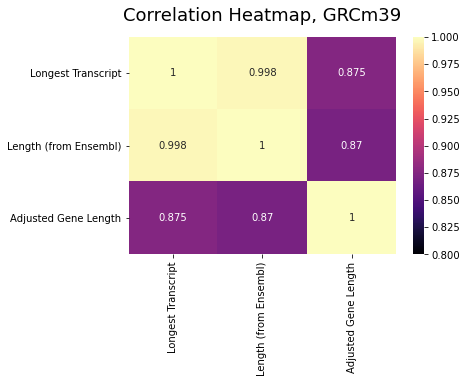

In [249]:
df.rename(columns={"length_of_the_longest_tr_coord": "Longest Transcript",
                   "Gene_length": "Length (from Ensembl)",
                  "Adjusted_gene_length": "Adjusted Gene Length"}, inplace = True)


heatmap = sns.heatmap(df.corr(), vmin=0.8, vmax=1, annot=True, cmap='magma', fmt='.3g')
heatmap.set_title('Correlation Heatmap, GRCm39', fontdict={'fontsize':18}, pad=16)

In [257]:
df.reset_index(drop = True)

,Gene name,Longest Transcript,Length (from Ensembl),Adjusted Gene Length
0,mt-Nd1,957.0,957,957.0
1,mt-Nd2,1038.0,1038,1038.0
2,mt-Co1,1545.0,1545,1545.0
3,mt-Co2,684.0,684,684.0
4,mt-Atp8,204.0,204,204.0
...,...,...,...,...
21880,Tmc2,69252.0,69252,68463.5
21881,Nop56,4884.0,4884,1989.0
21882,Idh3b,5239.0,5239,5118.0
21883,Raly,76152.0,76166,72798.5


In [199]:
mouse_39_genes['difference'] = mouse_39_genes.Gene_length - mouse_39_genes.length_of_the_longest_tr_coord

In [200]:
mouse_39_genes[mouse_39_genes.difference != 0].sort_values('difference', ascending=False).shape

(6673, 9)

In [201]:
(mouse_39_genes.Gene_length - mouse_39_genes.length_of_the_longest_tr_coord).describe()

count     21885.000000
mean        803.553073
std        8258.520181
min           0.000000
25%           0.000000
50%           0.000000
75%           6.000000
max      478093.000000
dtype: float64

In [331]:
mouse_39_genes.head()

,Gene name,length_of_the_longest_tr_coord,Gene start (bp),Gene end (bp),median_start,median_end,Gene_length,Adjusted_gene_length,difference
0,mt-Nd1,957.0,2751,3707,2751.0,3707.0,957,957.0,0.0
1,mt-Nd2,1038.0,3914,4951,3914.0,4951.0,1038,1038.0,0.0
2,mt-Co1,1545.0,5328,6872,5328.0,6872.0,1545,1545.0,0.0
3,mt-Co2,684.0,7013,7696,7013.0,7696.0,684,684.0,0.0
4,mt-Atp8,204.0,7766,7969,7766.0,7969.0,204,204.0,0.0


In [332]:
mouse_38_genes.head()

,0,1,2,3,4,5,6,7,8,gene_id,gene_biotype,gene_name,transcript_id,length_of_the_longest_tr_coord,median_start,median_end,gene_length,adj_length
6,1,ensembl_havana,gene,3205901,3671498,.,-,.,"gene_id ""ENSMUSG00000051951""; gene_version ""5""...",ENSMUSG00000051951,protein_coding,Xkr4,NaN,457017.0,3206523.0,3216344.0,465598,9822.0
74,1,ensembl_havana,gene,4290846,4409241,.,-,.,"gene_id ""ENSMUSG00000025900""; gene_version ""8""...",ENSMUSG00000025900,protein_coding,Rp1,NaN,118396.0,4317496.0,4384777.5,118396,67282.5
104,1,ensembl_havana,gene,4490931,4497354,.,-,.,"gene_id ""ENSMUSG00000025902""; gene_version ""11...",ENSMUSG00000025902,protein_coding,Sox17,NaN,5965.0,4492085.0,4496379.5,6424,4295.5
227,1,ensembl_havana,gene,4773206,4785739,.,-,.,"gene_id ""ENSMUSG00000033845""; gene_version ""11...",ENSMUSG00000033845,protein_coding,Mrpl15,NaN,12529.0,4776377.0,4785710.0,12534,9334.0
298,1,ensembl_havana,gene,4807788,4848410,.,+,.,"gene_id ""ENSMUSG00000025903""; gene_version ""12...",ENSMUSG00000025903,protein_coding,Lypla1,NaN,40623.0,4807897.0,4844000.5,40623,36104.5


In [354]:
m39_genes_new = mouse_39_genes[~mouse_39_genes['Gene stable ID'].isin(mouse_38_genes['gene_id'].values)]

In [469]:
m39_genes_new.shape

(636, 9)

In [478]:
with open("../ref_genome/m39_new_genes.txt", "w") as txt_file:
    for line in m39_genes_new['Gene name'].unique():
        txt_file.write(str(line) + "\n")

In [468]:
len(m39_genes_new['Gene name'].unique())

621

In [460]:
m38_genes_deprecated = mouse_38_genes[~mouse_38_genes['gene_id'].isin(mouse_39_genes['Gene stable ID'].values)]

In [465]:
m38_genes_deprecated.shape

(910, 18)

In [495]:
with open("../ref_genome/m38_genes_deprecated.txt", "w") as txt_file:
    for line in m38_genes_deprecated['gene_name'].unique():
        txt_file.write(str(line) + "\n")

In [464]:
len(m38_genes_deprecated.gene_name.unique())

900

Text(0.5, 1.0, 'Protein-coding genes in GRCm39 and GRCm38')

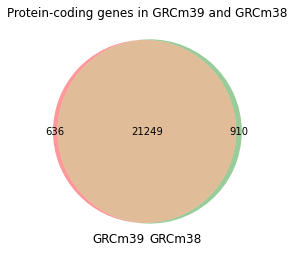

In [471]:
venn2([set(mouse_39_genes['Gene stable ID'].unique()), 
       set(mouse_38_genes['gene_id'].unique())], 
      set_labels = ('GRCm39', 'GRCm38'))
plt.title("Protein-coding genes in GRCm39 and GRCm38")

In [491]:
m39_new_genes_geo_up = pd.read_csv('../ref_genome/Aging_Perturbations_from_GEO_up_m39_new_genes.txt', sep = '\t')
m39_new_genes_geo_down = pd.read_csv('../ref_genome/Aging_Perturbations_from_GEO_down_m39_new_genes.txt', sep = '\t')

In [483]:
m39_new_genes_geo_up.head(1)

,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Mouse spleen 4 months vs 9 months GSE13148 agi...,3/134,0.790064,0.999996,0,0,0.713259,0.168073,4930563E22RIK;EPPK1;1700014B07RIK


In [485]:
m39_new_genes_geo_up_arr = m39_new_genes_geo_up.Genes.unique()

In [508]:
new_ageing = []
for i in m39_new_genes_geo_up_arr:
    tmp = i.split(';')
    for j in tmp:
        if j not in new_ageing:
            new_ageing.append(j)
            
for i in m39_new_genes_geo_down.Genes.unique():
    tmp = i.split(';')
    for j in tmp:
        if j not in new_ageing:
            new_ageing.append(j)

In [493]:
len(new_ageing)

109

In [496]:
m38_deprecated_geo_up = pd.read_csv('../ref_genome/Aging_Perturbations_from_GEO_up_m38_deprecated.txt', sep = '\t')
m38_deprecated_geo_down = pd.read_csv('../ref_genome/Aging_Perturbations_from_GEO_down_m38_deprecated.txt', sep = '\t')

In [509]:
deprecated_ageing = []
for i in m38_deprecated_geo_up.Genes.unique():
    tmp = i.split(';')
    for j in tmp:
        if j not in deprecated_ageing:
            deprecated_ageing.append(j)
            
for i in m38_deprecated_geo_down.Genes.unique():
    tmp = i.split(';')
    for j in tmp:
        if j not in deprecated_ageing:
            deprecated_ageing.append(j)

In [510]:
len(deprecated_ageing)

218

In [511]:
genage = pd.read_csv('../data/genage_models.csv')

In [513]:
genage.organism.unique()

array(['Caenorhabditis elegans', 'Mus musculus',
       'Saccharomyces cerevisiae', 'Drosophila melanogaster',
       'Mesocricetus auratus', 'Podospora anserina',
       'Schizosaccharomyces pombe', 'Danio rerio',
       'Caenorhabditis briggsae'], dtype=object)

In [515]:
genage = genage[genage.organism == 'Mus musculus']

In [521]:
genage[genage['symbol'].isin(m38_genes_deprecated.gene_name.unique())]

,GenAge ID,symbol,name,organism,entrez gene id,avg lifespan change (max obsv),lifespan effect,longevity influence


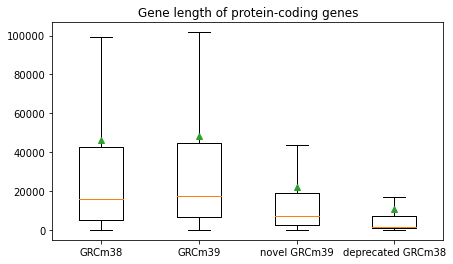

number of protein-coding genes in GRCm38: 22159
number of protein-coding genes in GRCm39: 21885
number of novel protein-coding genes in GRCm39: 636
number of deprecated protein-coding genes in GRCm38: 910


In [507]:
plt.figure(figsize=(7, 4))
bp = plt.boxplot([mouse_38_genes.length_of_the_longest_tr_coord, mouse_39_genes.length_of_the_longest_tr_coord,
                 m39_genes_new.length_of_the_longest_tr_coord,
                 m38_genes_deprecated.length_of_the_longest_tr_coord], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4], ['GRCm38', 'GRCm39',
                               'novel GRCm39', 'deprecated GRCm38'])
plt.title('Gene length of protein-coding genes')
plt.show()
print('number of protein-coding genes in GRCm38: %d' %(mouse_38_genes.shape[0]))
#print('    of which the number of havana genes: %d' %(m38[(m38[2] == 'gene') & (m38[1] == 'havana')].shape[0]))
print('number of protein-coding genes in GRCm39: %d' %(mouse_39_genes.shape[0]))
#print('    of which the number of havana genes: %d' %(m39[(m39[2] == 'gene') & (m39[1] == 'havana')].shape[0]))
print('number of novel protein-coding genes in GRCm39: %d' %(m39_genes_new.shape[0]))
print('number of deprecated protein-coding genes in GRCm38: %d' %(m38_genes_deprecated.shape[0]))

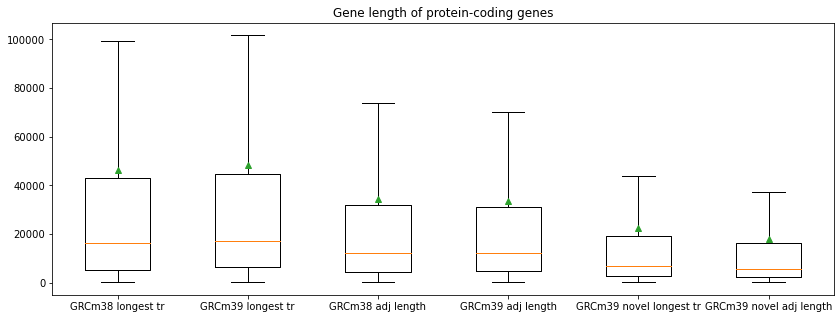

number of genes in GRCm38: 22159
number of genes in GRCm39: 21885
number of novel genes in GRCm39: 636


In [362]:
plt.figure(figsize=(14, 5))
bp = plt.boxplot([mouse_38_genes.length_of_the_longest_tr_coord, mouse_39_genes.length_of_the_longest_tr_coord,
                  mouse_38_genes.adj_length, mouse_39_genes.Adjusted_gene_length,
                 m39_genes_new.length_of_the_longest_tr_coord, m39_genes_new.Adjusted_gene_length], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4, 5, 6], ['GRCm38 longest tr', 'GRCm39 longest tr', 'GRCm38 adj length', 'GRCm39 adj length',
                               'GRCm39 novel longest tr', 'GRCm39 novel adj length'])
plt.title('Gene length of protein-coding genes')
plt.show()
print('number of genes in GRCm38: %d' %(mouse_38_genes.shape[0]))
#print('    of which the number of havana genes: %d' %(m38[(m38[2] == 'gene') & (m38[1] == 'havana')].shape[0]))
print('number of genes in GRCm39: %d' %(mouse_39_genes.shape[0]))
#print('    of which the number of havana genes: %d' %(m39[(m39[2] == 'gene') & (m39[1] == 'havana')].shape[0]))
print('number of novel genes in GRCm39: %d' %(m39_genes_new.shape[0]))

In [350]:
stat, p = scipy.stats.mannwhitneyu(mouse_38_genes.length_of_the_longest_tr_coord,
                                   mouse_39_genes.length_of_the_longest_tr_coord, alternative='two-sided')
print(p)

6.012813061983195e-18


In [363]:
stat, p = scipy.stats.mannwhitneyu(mouse_38_genes.adj_length, 
                                   mouse_39_genes.Adjusted_gene_length, alternative='two-sided')
print(p)

3.885909546073743e-05


In [364]:
stat, p = scipy.stats.mannwhitneyu(m39_genes_new.length_of_the_longest_tr_coord, 
                                   m39_genes_new.Adjusted_gene_length, alternative='two-sided')
print(p)

0.03836243970509103


In [356]:
m39_genes_new.shape

(636, 9)

In [368]:
m39_genes_new[['Gene name']].to_csv('../ref_genome/novel_protein_coding_in_m39.csv')

In [92]:
human = pd.read_csv('../ref_genome/hg_protein_coding_GRCh38.p13.txt', sep = ',')

In [95]:
human.head()

,Gene stable ID,Transcript stable ID,Gene start (bp),Gene end (bp),Transcript start (bp),Transcript end (bp),Transcript length (including UTRs and CDS),Gene name,Gene type,Transcript count,length_of_the_longest_tr_coord,longest_tr_len_paper
0,ENSG00000198888,ENST00000361390,3307,4262,3307,4262,956,MT-ND1,protein_coding,1,956.0,956.0
1,ENSG00000198763,ENST00000361453,4470,5511,4470,5511,1042,MT-ND2,protein_coding,1,1042.0,1042.0
2,ENSG00000198804,ENST00000361624,5904,7445,5904,7445,1542,MT-CO1,protein_coding,1,1542.0,1542.0
3,ENSG00000198712,ENST00000361739,7586,8269,7586,8269,684,MT-CO2,protein_coding,1,684.0,684.0
4,ENSG00000228253,ENST00000361851,8366,8572,8366,8572,207,MT-ATP8,protein_coding,1,207.0,207.0


In [388]:
#for i in tqdm(human['Gene stable ID'].unique()):
#    human.loc[human['Gene stable ID'] == i, 'longest_tr_len'] = human[human['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

for i in tqdm(human['Gene stable ID'].unique()):
    human.loc[human['Gene stable ID'] == i, 'length_of_the_longest_tr_coord'] = (abs(human.loc[human['Gene stable ID'] == i, 'Transcript end (bp)'] - human.loc[human['Gene stable ID'] == i, 'Transcript start (bp)']) + 1).max()
    human.loc[human['Gene stable ID'] == i, 'longest_tr_len_paper'] = human[human['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

100%|██████████| 22796/22796 [17:05<00:00, 22.24it/s]


In [387]:
for i in tqdm(human['Gene stable ID'].unique()):
    tr_df = human[human['Gene stable ID'] == i].copy()
    med_start = tr_df['Transcript start (bp)'].median()
    med_end = tr_df['Transcript end (bp)'].median()
    human.loc[human['Gene stable ID'] == i, 'median_start'] = med_start
    human.loc[human['Gene stable ID'] == i, 'median_end'] = med_end

100%|██████████| 22796/22796 [10:24<00:00, 36.48it/s]


In [390]:
human_genes = human[['Gene name', 'length_of_the_longest_tr_coord', 'longest_tr_len_paper', 'Gene start (bp)', 'Gene end (bp)', 'median_start', 'median_end']].drop_duplicates()
human_genes["Gene_length"] = abs(human_genes["Gene start (bp)"] - human_genes["Gene end (bp)"]) + 1
human_genes["Adjusted_gene_length"] = abs(human_genes["median_start"] - human_genes["median_end"]) + 1

,Gene name,length_of_the_longest_tr_coord,longest_tr_len_paper,Gene start (bp),Gene end (bp),median_start,median_end,Gene_length,Adjusted_gene_length
144631,RBFOX1,2471657.0,4884.0,5239802,7713340,7318500.0,7712847.5,2473539,394348.5
99630,CNTNAP2,2304198.0,9454.0,146116002,148420998,147341415.5,147996240.0,2304997,654825.5
126979,PTPRD,2298757.0,10389.0,8314246,10613002,8317340.5,8733946.0,2298757,416606.5
13290,PTPRD,2084572.0,9911.0,8314246,10612723,8317340.5,8733946.0,2298478,416606.5
92742,DMD,2092328.0,13992.0,31097677,33339609,31129927.0,31875373.0,2241933,745447.0


In [439]:
human_df = human_genes[['Gene name', 'Gene_length', 'length_of_the_longest_tr_coord', 'Adjusted_gene_length']]

In [440]:
human_df.sort_values('Gene_length', ascending=False).head()

,Gene name,Gene_length,length_of_the_longest_tr_coord,Adjusted_gene_length
144631,RBFOX1,2473539,2471657.0,394348.5
99630,CNTNAP2,2304997,2304198.0,654825.5
126979,PTPRD,2298757,2298757.0,416606.5
13290,PTPRD,2298478,2084572.0,416606.5
92742,DMD,2241933,2092328.0,745447.0


In [441]:
human_df[human_df['Gene name'] == 'IGF1']

,Gene name,Gene_length,length_of_the_longest_tr_coord,Adjusted_gene_length
103874,IGF1,85871,84690.0,78236.0


In [443]:
human_df.shape

(22526, 4)

/home/daria/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(0.5, 1.0, 'Correlation Heatmap, GRCh38.p13')

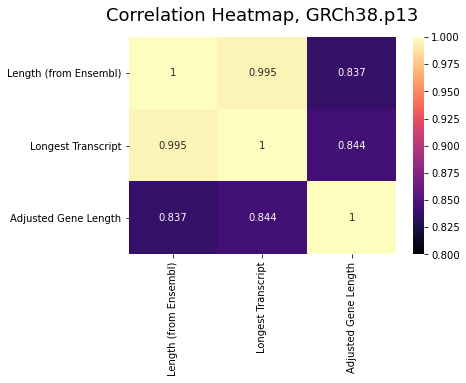

In [444]:
human_df.rename(columns={"length_of_the_longest_tr_coord": "Longest Transcript",
                   "Gene_length": "Length (from Ensembl)",
                  "Adjusted_gene_length": "Adjusted Gene Length"}, inplace = True)


heatmap = sns.heatmap(human_df.corr(), vmin=0.8, vmax=1, annot=True, cmap='magma', fmt='.3g')
heatmap.set_title('Correlation Heatmap, GRCh38.p13', fontdict={'fontsize':18}, pad=16)

In [126]:
macaque = pd.read_csv('../ref_genome/macaque_protein_coding_Mmul_10.txt', sep = '\t')

In [127]:
macaque.head()

,Gene stable ID,Transcript stable ID,Transcript start (bp),Transcript end (bp),Gene end (bp),Gene start (bp),Transcript length (including UTRs and CDS),Gene name,Transcript count
0,ENSMMUG00000023296,ENSMMUT00000032773,8231,26653,26653,8231,2681,NaN,1
1,ENSMMUG00000000634,ENSMMUT00000000911,71582,80807,83178,71582,1944,ZNF692,3
2,ENSMMUG00000000634,ENSMMUT00000094839,72369,83178,83178,71582,4141,ZNF692,3
3,ENSMMUG00000000634,ENSMMUT00000000912,72380,80608,83178,71582,1554,ZNF692,3
4,ENSMMUG00000037875,ENSMMUT00000000909,81258,91679,91679,81258,3015,ZNF672,3


In [394]:
#for i in tqdm(macaque['Gene stable ID'].unique()):
#    macaque.loc[macaque['Gene stable ID'] == i, 'longest_tr_len'] = macaque[macaque['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

for i in tqdm(macaque['Gene stable ID'].unique()):
    macaque.loc[macaque['Gene stable ID'] == i, 'length_of_the_longest_tr_coord'] = (abs(macaque.loc[macaque['Gene stable ID'] == i, 'Transcript end (bp)'] - macaque.loc[macaque['Gene stable ID'] == i, 'Transcript start (bp)']) + 1).max()
    macaque.loc[macaque['Gene stable ID'] == i, 'longest_tr_len_paper'] = macaque[macaque['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

100%|██████████| 21591/21591 [04:43<00:00, 76.14it/s]


In [395]:
for i in tqdm(macaque['Gene stable ID'].unique()):
    tr_df = macaque[macaque['Gene stable ID'] == i].copy()
    med_start = tr_df['Transcript start (bp)'].median()
    med_end = tr_df['Transcript end (bp)'].median()
    macaque.loc[macaque['Gene stable ID'] == i, 'median_start'] = med_start
    macaque.loc[macaque['Gene stable ID'] == i, 'median_end'] = med_end

100%|██████████| 21591/21591 [02:50<00:00, 126.74it/s]


In [396]:
macaque_genes = macaque[['Gene stable ID', 'Transcript count', 'length_of_the_longest_tr_coord', 
                         'Gene start (bp)', 'Gene end (bp)',
                        'median_start', 'median_end']].drop_duplicates()
macaque_genes["Gene_length"] = abs(macaque_genes["Gene start (bp)"] - macaque_genes["Gene end (bp)"]) + 1
macaque_genes["Adj_length"] = abs(macaque_genes["median_start"] - macaque_genes["median_end"]) + 1
macaque_genes.head()

,Gene stable ID,Transcript count,length_of_the_longest_tr_coord,Gene start (bp),Gene end (bp),median_start,median_end,Gene_length,Adj_length
0,ENSMMUG00000023296,1,18423.0,8231,26653,8231.0,26653.0,18423,18423.0
1,ENSMMUG00000000634,3,10810.0,71582,83178,72369.0,80807.0,11597,8439.0
4,ENSMMUG00000037875,3,10422.0,81258,91679,81259.0,91632.0,10422,10374.0
7,ENSMMUG00000000632,3,15174.0,102662,117835,102688.0,117833.0,15174,15146.0
10,ENSMMUG00000064799,1,1207.0,122996,124202,122996.0,124202.0,1207,1207.0


In [397]:
macaque_genes[['Gene stable ID', 'length_of_the_longest_tr_coord', 'Gene_length']].corr()

,length_of_the_longest_tr_coord,Gene_length
length_of_the_longest_tr_coord,1.000000,0.998801
Gene_length,0.998801,1.000000


In [131]:
chimp = pd.read_csv('../ref_genome/chimp_protein_coding_Pan_tro_3.0.txt', sep = '\t')

In [132]:
chimp.head()

,Gene stable ID,Transcript stable ID,Gene start (bp),Gene end (bp),Transcript start (bp),Transcript end (bp),Transcript length (including UTRs and CDS),Gene name,Transcript count
0,ENSPTRG00000042641,ENSPTRT00000076390,2725,3681,2725,3681,957,MT-ND1,1
1,ENSPTRG00000042626,ENSPTRT00000076387,3888,4931,3888,4931,1044,MT-ND2,1
2,ENSPTRG00000042657,ENSPTRT00000076402,5321,6862,5321,6862,1542,MT-CO1,1
3,ENSPTRG00000042660,ENSPTRT00000076397,7003,7686,7003,7686,684,MT-CO2,1
4,ENSPTRG00000042653,ENSPTRT00000076398,7784,7990,7784,7990,207,MT-ATP8,1


In [398]:
#for i in tqdm(chimp['Gene stable ID'].unique()):
#    chimp.loc[chimp['Gene stable ID'] == i, 'longest_tr_len'] = chimp[chimp['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

for i in tqdm(chimp['Gene stable ID'].unique()):
    chimp.loc[chimp['Gene stable ID'] == i, 'length_of_the_longest_tr_coord'] = (abs(chimp.loc[chimp['Gene stable ID'] == i, 'Transcript end (bp)'] - chimp.loc[chimp['Gene stable ID'] == i, 'Transcript start (bp)']) + 1).max()
    chimp.loc[chimp['Gene stable ID'] == i, 'longest_tr_len_paper'] = chimp[chimp['Gene stable ID'] == i]['Transcript length (including UTRs and CDS)'].max()

100%|██████████| 23302/23302 [05:05<00:00, 76.17it/s]


In [399]:
for i in tqdm(chimp['Gene stable ID'].unique()):
    tr_df = chimp[chimp['Gene stable ID'] == i].copy()
    med_start = tr_df['Transcript start (bp)'].median()
    med_end = tr_df['Transcript end (bp)'].median()
    chimp.loc[chimp['Gene stable ID'] == i, 'median_start'] = med_start
    chimp.loc[chimp['Gene stable ID'] == i, 'median_end'] = med_end

100%|██████████| 23302/23302 [03:12<00:00, 120.76it/s]


In [400]:
chimp_genes = chimp[['Gene stable ID', 'Transcript count', 'length_of_the_longest_tr_coord', 
                     'longest_tr_len_paper', 'Gene start (bp)', 'Gene end (bp)',
                    'median_start', 'median_end']].drop_duplicates()
chimp_genes["Gene_length"] = abs(chimp_genes["Gene start (bp)"] - chimp_genes["Gene end (bp)"]) + 1
chimp_genes["Adj_length"] = abs(chimp_genes["median_start"] - chimp_genes["median_end"]) + 1
chimp_genes.head()

,Gene stable ID,Transcript count,length_of_the_longest_tr_coord,longest_tr_len_paper,Gene start (bp),Gene end (bp),median_start,median_end,Gene_length,Adj_length
0,ENSPTRG00000042641,1,957.0,957.0,2725,3681,2725.0,3681.0,957,957.0
1,ENSPTRG00000042626,1,1044.0,1044.0,3888,4931,3888.0,4931.0,1044,1044.0
2,ENSPTRG00000042657,1,1542.0,1542.0,5321,6862,5321.0,6862.0,1542,1542.0
3,ENSPTRG00000042660,1,684.0,684.0,7003,7686,7003.0,7686.0,684,684.0
4,ENSPTRG00000042653,1,207.0,207.0,7784,7990,7784.0,7990.0,207,207.0


In [401]:
chimp_genes[['Gene stable ID', 'length_of_the_longest_tr_coord', 'Gene_length']].corr()

,length_of_the_longest_tr_coord,Gene_length
length_of_the_longest_tr_coord,1.000000,0.999467
Gene_length,0.999467,1.000000


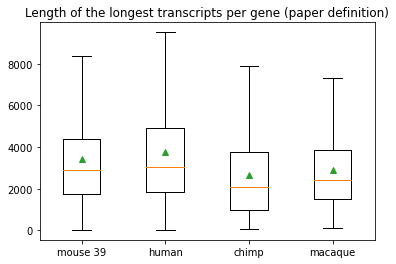

In [139]:
bp = plt.boxplot([mouse_39_genes['longest_tr_len_paper'] ,
                  human_genes['longest_tr_len_paper'],
                  chimp_genes['longest_tr_len_paper'],
                  macaque_genes['longest_tr_len_paper']], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4], ['mouse 39', 'human', 'chimp', 'macaque'])
plt.title('Length of the longest transcripts per gene (paper definition)')
plt.show()

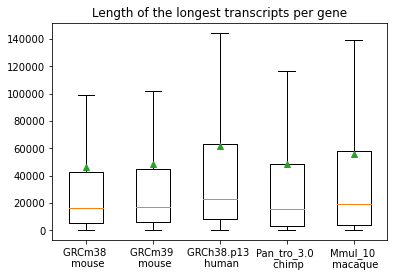

In [418]:
bp = plt.boxplot([mouse_38_genes['length_of_the_longest_tr_coord'],
                  mouse_39_genes['length_of_the_longest_tr_coord'] ,
                  human_genes['length_of_the_longest_tr_coord'],
                  chimp_genes['length_of_the_longest_tr_coord'],
                  macaque_genes['length_of_the_longest_tr_coord']], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4, 5], ['GRCm38 \n mouse', 'GRCm39 \n mouse',
                             'GRCh38.p13 \n human', 'Pan_tro_3.0 \n chimp', 'Mmul_10 \n macaque'])
plt.title('Length of the longest transcripts per gene')
plt.show()

In [448]:
print(mouse_38_genes.shape)
print(mouse_39_genes.shape)
print(human_genes.shape)
print(chimp_genes.shape)
print(macaque_genes.shape)

(22159, 18)
(21885, 9)
(22526, 9)
(23302, 10)
(21591, 9)


In [450]:
print(mouse_38_genes['length_of_the_longest_tr_coord'].mean())
print(mouse_39_genes['length_of_the_longest_tr_coord'].mean())
print(human_genes['length_of_the_longest_tr_coord'].mean())
print(chimp_genes['length_of_the_longest_tr_coord'].mean())
print(macaque_genes['length_of_the_longest_tr_coord'].mean())

46127.296358138905
48388.12826136623
61544.91290064814
48592.364518067116
55939.816868139504


In [451]:
print(mouse_38_genes['length_of_the_longest_tr_coord'].median())
print(mouse_39_genes['length_of_the_longest_tr_coord'].median())
print(human_genes['length_of_the_longest_tr_coord'].median())
print(chimp_genes['length_of_the_longest_tr_coord'].median())
print(macaque_genes['length_of_the_longest_tr_coord'].median())

16140.0
17288.0
23033.5
15436.5
19116.0


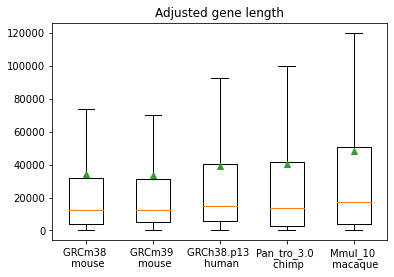

In [419]:
bp = plt.boxplot([mouse_38_genes['adj_length'],
                  mouse_39_genes['Adjusted_gene_length'] ,
                  human_genes['Adjusted_gene_length'],
                  chimp_genes['Adj_length'],
                  macaque_genes['Adj_length']], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4, 5], ['GRCm38 \n mouse', 'GRCm39 \n mouse',
                             'GRCh38.p13 \n human', 'Pan_tro_3.0 \n chimp', 'Mmul_10 \n macaque'])
plt.title('Adjusted gene length')
plt.show()

In [452]:
print(mouse_38_genes['adj_length'].mean())
print(mouse_39_genes['Adjusted_gene_length'].mean())
print(human_genes['Adjusted_gene_length'].mean())
print(chimp_genes['Adj_length'].mean())
print(macaque_genes['Adj_length'].mean())

34443.90157498082
33373.41836874572
39256.38382313771
40397.63805681916
48342.68780973554


In [453]:
print(mouse_38_genes['adj_length'].median())
print(mouse_39_genes['Adjusted_gene_length'].median())
print(human_genes['Adjusted_gene_length'].median())
print(chimp_genes['Adj_length'].median())
print(macaque_genes['Adj_length'].median())

12218.5
12265.0
15051.0
13603.5
17042.5


In [69]:
stat, p = scipy.stats.mannwhitneyu(macaque[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len'].values, 
                                   chimp[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len'].values, 
                                   alternative='two-sided')
print(p)

9.309902843202235e-100


In [ ]:
bp = plt.boxplot([mouse_39[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len'] ,
                  human[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len'],
                  chimp[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len'],
                  macaque[['Gene stable ID', 'longest_tr_len']].drop_duplicates()['longest_tr_len']], showfliers=False, showmeans=True)
plt.xticks([1, 2, 3, 4], ['mouse 39', 'human', 'chimp', 'macaque'])
plt.title('Length of the longest transcripts per gene')
plt.show()

In [456]:
mouse_39_genes.to_csv('../ref_genome/m39_gene_lengths_protein_coding.csv', index = None)